In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


In [2]:
df = pd.read_excel("Decoder+TOC.xlsx")
df.set_index("Wright Numeration", inplace = True)
df.head()

,Shelfmark,Wright Section,Wright Sub-Section,Wright Dating,From Date,Wright's Dating Calc.,To Date,Dated,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage
Wright Numeration,,,,,,,,,,,,,,,,,,,
LI,"Add.12,133,foll.109-169",Biblical Manuscripts,Old Testament,8c,701.0,701-799,799.0,False,False,False,False,True,False,False,1,31-32,1,31,32.0
IX,"Add.12,133,foll.1-108",Biblical Manuscripts,Old Testament,8c(early),701.0,701-799,799.0,False,False,False,False,True,False,False,1,7-8,1,7,8.0
XLIX,"Add.12,134",Biblical Manuscripts,Old Testament,697,697.0,697,697.0,True,False,False,False,True,False,False,1,29-31,2,29,31.0
XL,"Add.12,135,foll.1-43",Biblical Manuscripts,Old Testament,726,726.0,726,726.0,True,False,False,False,True,False,False,1,24-26,2,24,26.0
DCXIII,"Add.12,135,foll.44-207",Theology (Individual),Individual Authors,611,611.0,611,611.0,True,False,False,False,False,True,False,2,486-487,1,486,487.0


In [83]:
def centuryFromYear(year):
    return (year) // 100 + 1

def get_authors(): # e.g.:'BL data', '39.xml'
    df = pd.read_excel("Decoder+TOC.xlsx")
    df.set_index("Wright Numeration", inplace = True)
    folder = 'BL Data'
    authors_df = []#pd.DataFrame(columns = ['name', 'shelfmark', 'date', 'file'])
    for filename in os.listdir(folder):
        tree = ET.parse(f'{folder}/{filename}')
        root = tree.getroot()
        if len(root.findall('.//{http://www.tei-c.org/ns/1.0}msPart'))!=0:
            for part in root.iter('{http://www.tei-c.org/ns/1.0}msPart'):
                #print(f'multi ms: {filename}')
                #get multiple ms parts
                for idno in part.iter('{http://www.tei-c.org/ns/1.0}idno'):
                    if 'type' in idno.attrib.keys():
                        if 'Wright-BL-Roman' in idno.attrib['type']:
                            idno = idno.text
                            date = df.loc[idno]['To Date']
                            shelfmark = df.loc[idno]['Shelfmark']
                for item in part.iter('{http://www.tei-c.org/ns/1.0}author'):
                    if item.text != 'William Wright' and item.text is not None and item.text !='\n':
                        author = item.text
                        trial_df = pd.DataFrame([{'name': author, 'shelfmark': shelfmark, 'date': date, 'file':filename}])
                        authors_df.append(trial_df)                

        else:
            #print(f'single ms: {filename}')
            for idno in root.iter('{http://www.tei-c.org/ns/1.0}idno'):
                if 'type' in idno.attrib.keys():
                    if 'Wright-BL-Roman' in idno.attrib['type']:
                        idno = idno.text
                        date = df.loc[idno]['To Date']
                        shelfmark = df.loc[idno]['Shelfmark']
            for item in root.iter('{http://www.tei-c.org/ns/1.0}author'):
                if item.text != 'William Wright' and item.text is not None and item.text !='\n':
                    author = item.text
                    trial_df = pd.DataFrame([{'name': author, 'shelfmark': shelfmark, 'date': date, 'file':filename}])
                    authors_df.append(trial_df)
    return authors_df

In [ ]:
df = pd.read_excel("Decoder+TOC.xlsx")
df.set_index("Wright Numeration", inplace = True)
folder = 'BL Data'
authors_df = pd.DataFrame(columns = ['name', 'shelfmark', 'date', 'file'])
for filename in os.listdir(folder):
    tree = ET.parse(f'{folder}/{filename}')
    root = tree.getroot()

In [84]:
df = get_authors()
dfs = pd.concat(df)
dfs.head(20)

,name,shelfmark,date,file
0,Solomon,"Add.12,138",899.0,10.xml
0,Jesus the son of Sirach,"Add.12,138",899.0,10.xml
0,Ephraim,"Add.14,438,foll.50-101",599.0,100.xml
0,"Julius, Pope of Rome","Add.17,229,foll.1-47",1218.0,1008.xml
0,Philoxenus of Mabug,"Add.17,229,foll.1-47",1218.0,1008.xml
0,Jacob of Batnae,"Add.17,229,foll.1-47",1218.0,1008.xml
0,Thomas of Heraclea,"Add.17,229,foll.1-47",1218.0,1008.xml
0,John the Evangelist,"Add.17,229,foll.1-47",1218.0,1008.xml
0,"James, Brother of our Lord","Add.17,229,foll.1-47",1218.0,1008.xml
0,Xystus of Rome,"Add.17,229,foll.1-47",1218.0,1008.xml


In [143]:
dfs_filter = dfs[dfs['date']<=1000.0]
dfs_filter.drop_duplicates(inplace=True)
dfs_filter['century'] = dfs_filter['date'].apply(lambda x: centuryFromYear(x))
dfs_filter.head()

<ipython-input-143-f7e16d35404a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_filter.drop_duplicates(inplace=True)


,name,shelfmark,date,file
0,Solomon,"Add.12,138",899.0,10.xml
0,Jesus the son of Sirach,"Add.12,138",899.0,10.xml
0,Ephraim,"Add.14,438,foll.50-101",599.0,100.xml
0,Babaeus,"Add.17,270",899.0,1098.xml
0,Abraham bar Dāshendād,"Add.17,270",899.0,1098.xml


In [145]:
dfs_filter.to_excel('BL authors.xlsx', index=False)

In [146]:
dfs_filter.set_index('name', inplace=True)
dfs_filter.head()

,shelfmark,date,file,century
name,,,,
Solomon,"Add.12,138",899.0,10.xml,9.0
Jesus the son of Sirach,"Add.12,138",899.0,10.xml,9.0
Ephraim,"Add.14,438,foll.50-101",599.0,100.xml,6.0
Babaeus,"Add.17,270",899.0,1098.xml,9.0
Abraham bar Dāshendād,"Add.17,270",899.0,1098.xml,9.0


<AxesSubplot:>

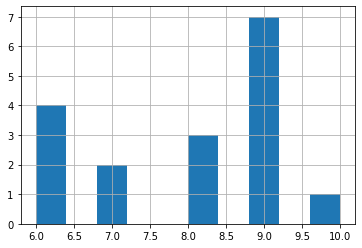

In [156]:
s = dfs_filter.loc['Basil']['century']
s.hist()

In [159]:
dfs_filter.describe()

,date,century
count,987.000000,987.000000
mean,777.689970,7.884498
std,150.319683,1.456201
min,412.000000,5.000000
25%,699.000000,7.000000
50%,700.000000,8.000000
75%,899.000000,9.000000
max,999.000000,10.000000


In [95]:
count = dfs.groupby(['name']).count()
count

,shelfmark,date,file
name,,,
\n,34,34,34
\n,10,10,10
\n,8,8,8
\n,5,5,5
\n,13,13,13
...,...,...,...
"the orthodox bishops (Sergius, Marion, Nonnus, Thomas, and John)",1,1,1
the synod (of Antioch),1,1,1
ܐܠܦܠܘܠܪܝܣ,1,1,1


In [59]:
tree = ET.parse('BL data/1.xml')
root = tree.getroot()

In [60]:
root.findall('.//{http://www.tei-c.org/ns/1.0}msPart')

[<Element '{http://www.tei-c.org/ns/1.0}msPart' at 0x000001777C4AF810>,
 <Element '{http://www.tei-c.org/ns/1.0}msPart' at 0x000001777C07A270>]

In [26]:
title = ''
for item in root.iter('{http://www.tei-c.org/ns/1.0}titleStmt'):
    title=item[0].text
title

'BL Add MS 12161'

In [28]:
authors = []
for item in root.iter('{http://www.tei-c.org/ns/1.0}author'):
    if item.text != 'William Wright' and item.text is not None:
        authors.append(item.text)
    
authors

['John Chrysostom', 'John Chrysostom']

In [29]:
filename = 'bla'
ms = []
authors = []
dates = []
for part in root.iter('{http://www.tei-c.org/ns/1.0}msPart'):
    print(part.attrib['n']) #get multiple ms parts
    for idno in part.iter('{http://www.tei-c.org/ns/1.0}idno'):
        if 'type' in idno.attrib.keys():
            if 'Wright-BL-Roman' in idno.attrib['type']:
                idno = idno.text
                date = df.loc[idno]['To Date']
                shelfmark = df.loc[idno]['Shelfmark']
                
    for item in part.iter('{http://www.tei-c.org/ns/1.0}author'):
        if item.text != 'William Wright' and item.text is not None:
            authors.append(item.text)
            dates.append(date)
            ms.append(shelfmark)
    ms_part = {idno: authors}
    ms.append(ms_part)
if len(ms) == 0: #no parts to ms, so get entire ms
    print('single')
    for idno in root.iter('{http://www.tei-c.org/ns/1.0}idno'):
        if 'type' in idno.attrib.keys():
            if 'Wright-BL-Roman' in idno.attrib['type']:
                idno = idno.text
                date = df.loc[idno]['To Date']
                shelfmark = df.loc[idno]['Shelfmark']
                
    authors = []
    for item in root.iter('{http://www.tei-c.org/ns/1.0}author'):
        if item.text != 'William Wright' and item.text is not None:
            author = item.text
            authors.append(item.text)
    ms_part = {idno: authors}
    ms.append(ms_part)
ms

single


[{'DLXXXVII': ['John Chrysostom', 'John Chrysostom']}]